# _polynomial_.cotrie

Generate a "cotrie" automaton (multiple initial state, single final state automaton: a reversed tree) from a finite series, given as a polynomial of words.

Postconditions:
- `Result.is_codeterministic()`
- `Result = p.cotrie.shortest(N)` for a large enough N.

See also:
- [context.cotrie](context.cotrie.ipynb)
- [polynomial.trie](polynomial.trie.ipynb)

## Examples

In [1]:
import vcsn

### Boolean weights (finite language)

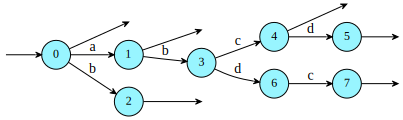

In [2]:
language = '\e+a+b+abc+abcd+abdc'

b = vcsn.context('lal_char, b')
B = vcsn.context('law_char, b')

B.polynomial(language).trie()

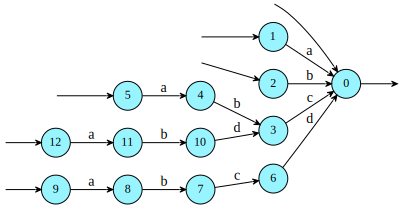

In [3]:
B.polynomial(language).cotrie()

Since the cotrie is codeterministic, determinizing it suffices to minimize it.  It turns out that in the current implementation of Vcsn, it is faster to determinize than to minimize:

In [4]:
%timeit B.polynomial(language).trie().minimize()

10000 loops, best of 3: 71.5 µs per loop


In [5]:
%timeit B.polynomial(language).cotrie().determinize()

10000 loops, best of 3: 39.6 µs per loop


In [6]:
a1 = B.polynomial(language).trie().minimize()
a2 = B.polynomial(language).cotrie().determinize()
a1.is_isomorphic(a2)

True